In [1]:
import pandas as pd

import plotly.express as px
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


from tqdm.notebook import tqdm
tqdm.pandas()
pd.options.display.max_columns = 999

import plotly.graph_objects as go
import ipyvuetify as v

from ipywidgets import interact, Checkbox, Select, Output, widgets
import ipywidgets
from datetime import datetime

from IPython.display import display


import continental_level_plots
import country_level_plots
import flight_level_plots
import time

In [2]:
#### Import various plot file. In case the source file is modified, please rerun preprocess.py ####

import preprocess
preprocess.preprocess()

In [3]:

#read continental level data
continental_flows=pd.read_csv('./plot_files/continental_flows.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
continental_flows_non_dir=pd.read_csv('./plot_files/continental_flows_non_dir.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
conti_scatter=pd.read_csv('./plot_files/conti_scatter.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)

#read country level data
country_flows=pd.read_csv('./plot_files/country_flows.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
country_fixed=pd.read_csv('./plot_files/country_fixed.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)
country_fixed_sep_dom=pd.read_csv('./plot_files/country_fixed_sep_dom.csv',sep=',', keep_default_na=False, na_values=['', 'NaN'], index_col=0)

#read flight_level_data
flights_df=pd.read_csv('./plot_files/flights_df.zip',compression='zip', sep=',',keep_default_na=False, na_values=['', 'NaN'], index_col=0)

# 1- Flight distance, $CO_2$ emissions and prospects for decarbonization


In this section, AeroSCOPE is use dto evaluate te decarbonization potential of various alternative aircarft types (Turbopropeller) at the global level.  
Then a similar analysis is conducted for two individual countries, Netherlands and Norway. 

* Turbopropeller aircraft: <br> 
    - 500NM : Short range turboprop or fuel cell electric, 100 pax 
    - 2500NM : Short-Medium range turbofan (conventional or blended wing body), 150 pax 






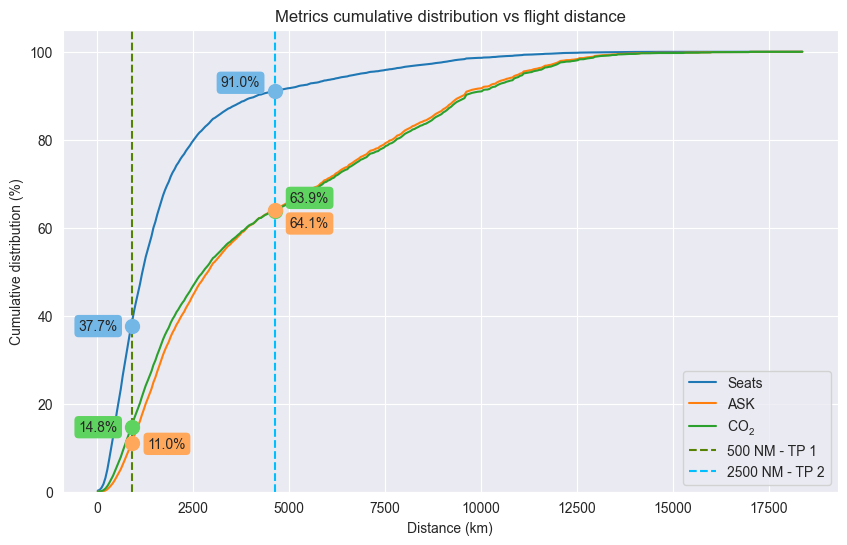

In [4]:
%matplotlib agg

#Directly using AeroSCOPE plot

sns.set_style("darkgrid")
# Create a new figure with a single subplot
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(flights_df, x='distance_km', weights='seats', label='Seats', element='poly',fill=False, cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)
sns.histplot(flights_df, x='distance_km', weights='ask', label= 'ASK', element='poly',fill=False, cumulative = True, stat='percent',ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)
sns.histplot(flights_df, x='distance_km', weights='co2', label= '$\mathregular{CO_2}$', element='poly',fill=False, cumulative = True, stat='percent', ax=ax,bins=range(0, int(flights_df["distance_km"].max()) + 50, 50),)

ax.legend()

# Set the title, x-axis label, and y-axis label
ax.set_title("Metrics cumulative distribution vs flight distance")
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Cumulative distribution (%)")



# Add vertical lines at 500, 1000, and 2000 NM
ax.axvline(x=500*1.852, color='#568203', linestyle='--', label='500 NM - TP 1')
ax.axvline(x=2500*1.852, color='#00BFFF', linestyle='--', label='2500 NM - TP 2')




#CO2
# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#5FD35F')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#5FD35F'))



y_value = np.interp(2500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['co2'])/sum(flights_df['co2'])*100)
ax.scatter(2500*1.852, y_value, marker='o',s=100, zorder=5, color='#5FD35F')  
ax.annotate(f'{y_value:.1f}%', xy=(2500*1.852+400, y_value+2),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#5FD35F'))




# Seats

# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['seats'])/sum(flights_df['seats'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#73B7E7')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852-1400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#73B7E7'))



y_value = np.interp(2500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['seats'])/sum(flights_df['seats'])*100)
ax.scatter(2500*1.852, y_value, marker='o',s=100, zorder=5, color='#73B7E7')  
ax.annotate(f'{y_value:.1f}%', xy=(2500*1.852-1400, y_value+1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#73B7E7'))



# ASK
# Find the corresponding y-value at the intersection point
y_value = np.interp(500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['ask'])/sum(flights_df['ask'])*100)
ax.scatter(500*1.852, y_value, marker='o',s=100, zorder=5, color='#FFA85C')
ax.annotate(f'{y_value:.1f}%', xy=(500*1.852+400, y_value-1),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFA85C'))



y_value = np.interp(2500*1.852, flights_df['distance_km'].sort_values(), np.cumsum(flights_df.sort_values(by='distance_km')['ask'])/sum(flights_df['ask'])*100)
ax.scatter(2500*1.852, y_value, marker='o',s=100, zorder=5, color='#FFA85C')  
ax.annotate(f'{y_value:.1f}%', xy=(2500*1.852+400, y_value-4),
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='#FFA85C'))



ax.legend()

fig.savefig('metric_repartition_ICAS.pdf', bbox_inches='tight')
fig